# Project: Indeed Data Science Jobs Market Analysis (2024)

## Introduction
This project involves data scraping and exploratory data analysis (EDA) of job listings from the Indeed.com website. It focuses on the job market for data scientists in the USA as of October 2024.

## Tools & Modules Used
Python3 | Jupyer | Selenium | Pandas | Plotly | Numpy | Matplotlib | Seaborn

## Import Library

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.chrome.service import Service
import csv
from typing import List, Dict
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from IPython.display import display



## Scraping the data

Data Collection: This project relies on web scraping using Selenium.

In [2]:
# Path to ChromeDriver
service = Service(executable_path=r'chromedriver.exe')
driver = webdriver.Chrome()

job_listings = []

for page in range(0, 60, 10):
    url = f"https://www.indeed.com/jobs?q=data+scientist&l=usa&start={page}"
    
    # Set up Chrome options with User-Agent header
    chrome_options = Options()
    chrome_options.add_argument(f'user-agent=Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36')
    #chrome_options.add_argument("--headless")  # Run in headless mode (no GUI)
    #chrome_options.add_argument("--no-sandbox")
    #chrome_options.add_argument("--disable-dev-shm-usage")

    # Initialize the WebDriver

    driver.get(url)
    time.sleep(3)  # Wait for the page to load

    job_elements = driver.find_elements(By.CLASS_NAME, "job_seen_beacon")

    try:
        w = WebDriverWait(driver, 10)
        w.until(EC.presence_of_element_located((By.CLASS_NAME,"job_seen_beacon")))
    except:
        driver.quit()
    
    i = 0
    for job in job_elements:
        i = i + 1
        
        try:
            title_element = driver.find_element(By.XPATH, f"/html/body/main/div/div[2]/div/div[5]/div/div[1]/div[5]/div/ul/li[{i}]/div/div/div/div/div/div/table/tbody/tr/td[1]/div[1]/h2/a")
            company_element = driver.find_element(By.XPATH, f"/html/body/main/div/div[2]/div/div[5]/div/div[1]/div[5]/div/ul/li[{i}]/div/div/div/div/div/div/table/tbody/tr/td[1]/div[2]/div/div[1]/span")
            city_element = driver.find_element(By.XPATH, f"/html/body/main/div/div[2]/div/div[5]/div/div[1]/div[5]/div/ul/li[{i}]/div/div/div/div/div/div/table/tbody/tr/td[1]/div[2]/div/div[2]")
            #description_element = driver.find_element(By.XPATH, f"/html/body/main/div/div[2]/div/div[5]/div/div[1]/div[5]/div/ul/li[{i}]/div/div/div/div/div/div/table/tbody/tr/td[1]/div[3]/div[2]")
            
            title_element.click()
            time.sleep(6)
            
            description_full = driver.find_element(By.ID, "jobDescriptionText")
            
            try:
                company_rating = driver.find_element(By.XPATH, f"/html/body/main/div/div[2]/div/div[5]/div/div[2]/div/div/div[2]/div[2]/div[1]/div/div[1]/div[2]/div/div/div/div[1]/div[2]/span[1]").text
            except NoSuchElementException:
                company_rating = 0  # Set 0 if the company rating is not found
            
            job_listings.append({
                'title': title_element.text,
                'company': company_element.text,
                'location': city_element.text,
                'rating' : company_rating,
                'description' : description_full.text
            })
                
        except:
            pass

    driver.quit()  # Close the WebDriver

MaxRetryError: HTTPConnectionPool(host='localhost', port=63477): Max retries exceeded with url: /session/434fa24040843b8723e5e16b063a25bd/url (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000024F12FA1F50>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [27]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

# Path to ChromeDriver
service = Service(executable_path=r'chromedriver.exe')
driver = webdriver.Chrome(service=service)

# Clear cache and cookies
driver.delete_all_cookies()

# Load a page to verify it's working again
driver.get("https://www.example.com")

driver.quit()


## Creating the data frame and saving the scrapped data

In [15]:
job_listings

[{'title': 'Data Scientist',
  'company': 'SAS',
  'location': 'Remote in Cary, NC 27513',
  'rating': '4.1',
  'description': ":\n\nData Scientist- Remote or Hybrid\n*Position is open to work in the US or Scotland based on where the candidate is eligible to work*\n\nNice to meet you!\n\nWe’re a leader in data and AI. Through our software and services, we inspire customers around the world to transform data into intelligence - and questions into answers.\nWe’re also a debt-free multi-billion-dollar organization on our path to IPO-readiness. If you're looking for a dynamic, fulfilling career coupled with flexibility and world-class employee experience, you'll find it here.\n\nAbout the job\n\nThe Applied AI and Modeling is looking for a Data Scientist to use state-of-art advanced analytics software to design, build and implement innovative solutions for our customers. Our team creates containerized models and model packages, which utilize Artificial Intelligence to store and access doma

In [37]:
def save_to_csv(filename: str, job_listings: List[Dict[str, str]]) -> None:

    if not job_listings:
        print("No job listings to save.")
        return

    with open(filename, 'a', newline='') as csvfile:
        fieldnames = ['title', 'company', 'location', 'rating', 'description']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        # Write the header row if the file is new
        if csvfile.tell() == 0:
            writer.writeheader()

        # Write the job listings to the CSV file
        for job in job_listings:
            writer.writerow(job)


save_to_csv("data.csv", job_listings)

In [82]:
# Read the CSV file into a DataFrame
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

# Display the first few rows of the DataFrame
print(df.head())
print(df.info())
print(df.columns)


                                               title             company  \
0                                     Data Scientist                 SAS   
1                                     Data Scientist  Ford Motor Company   
2                                Data Scientist, MMM              PayPal   
3                         Data Scientist II (Remote)               KOHLS   
4  Data Scientist Graduate (Global E-Commerce-Dat...              TikTok   

                              location               rating  \
0             Remote in Cary, NC 27513                  4.1   
1         Remote in Dearborn, MI 48124                  4.1   
2            Hybrid work in Austin, TX                  NaN   
3  Remote in Menomonee Falls, WI 53051                  3.6   
4                          Seattle, WA  (part of ByteDance)   

                                         description  
0  :\n\nData Scientist- Remote or Hybrid\n*Positi...  
1  Data Scientist\nWe are the movers of the world...  

In [83]:
print(df.describe())

                 title company                  location rating  \
count               26      26                        26     22   
unique               6      15                        15     10   
top     Data Scientist     SAS  Remote in Cary, NC 27513    4.1   
freq                16       2                         2      4   

                                              description  
count                                                  26  
unique                                                 15  
top     :\n\nData Scientist- Remote or Hybrid\n*Positi...  
freq                                                    2  


Next steps is to:
1. Handle Missing Ratings: Since ratings are missing for some entries, we need to decide whether to remove these rows, fill them with a default value like 0, or perform another imputation.

2. Split location into city and zip

In [84]:
#lets lower case all the strings to avoid redundancy
df = df.apply(lambda x: x.astype(str).str.lower())

# Split the location column by comma and expand into separate columns
df[['city', 'state_zip']] = df['location'].str.split(',', expand=True)

# Change the rating column type to float, converting non-numeric values to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Fill NaN values with 0
df['rating'].fillna(0, inplace=True)

print(df.head())
print(df.info())


                                               title             company  \
0                                     data scientist                 sas   
1                                     data scientist  ford motor company   
2                                data scientist, mmm              paypal   
3                         data scientist ii (remote)               kohls   
4  data scientist graduate (global e-commerce-dat...              tiktok   

                              location  rating  \
0             remote in cary, nc 27513     4.1   
1         remote in dearborn, mi 48124     4.1   
2            hybrid work in austin, tx     0.0   
3  remote in menomonee falls, wi 53051     3.6   
4                          seattle, wa     0.0   

                                         description  \
0  :\n\ndata scientist- remote or hybrid\n*positi...   
1  data scientist\nwe are the movers of the world...   
2  the company\npaypal has been revolutionizing c...   
3  about the role\

C:\Users\braja\AppData\Local\Temp\ipykernel_2288\2533074553.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(0, inplace=True)


## Exploratory Data Analysis

The purpose of the EDA:
1. Analyze Job Locations: The location field might need to be split to extract useful insights about job locations (city/state).
2. Company and Role Distribution: Analyzing the distribution of companies and roles can give insight into the hiring landscape.
3. Description Content: Word cloud or keyword analysis in the job descriptions can reveal common skills and requirements.

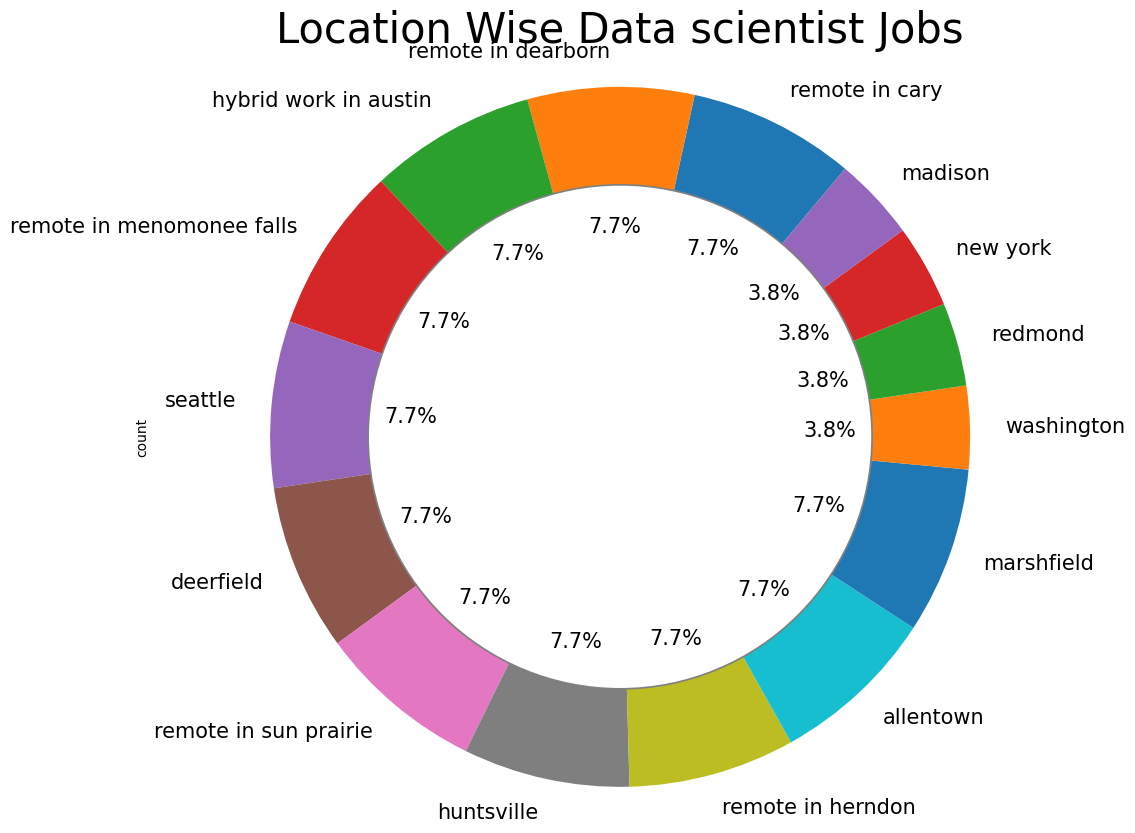

In [85]:
df.city.apply(pd.Series).stack().str.strip().value_counts()[:100].plot.pie(figsize=(12,10),startangle=50,autopct='%1.1f%%',fontsize=15)
plt.title("Location Wise Data scientist Jobs",fontsize=30)

centre_circle = plt.Circle((0,0),0.72,color='gray', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

From the job postings, we can see the Data Science field still have remote jobs opening more than 30% 

c:\Users\braja\Data-Science-machine-learning-Project-2\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


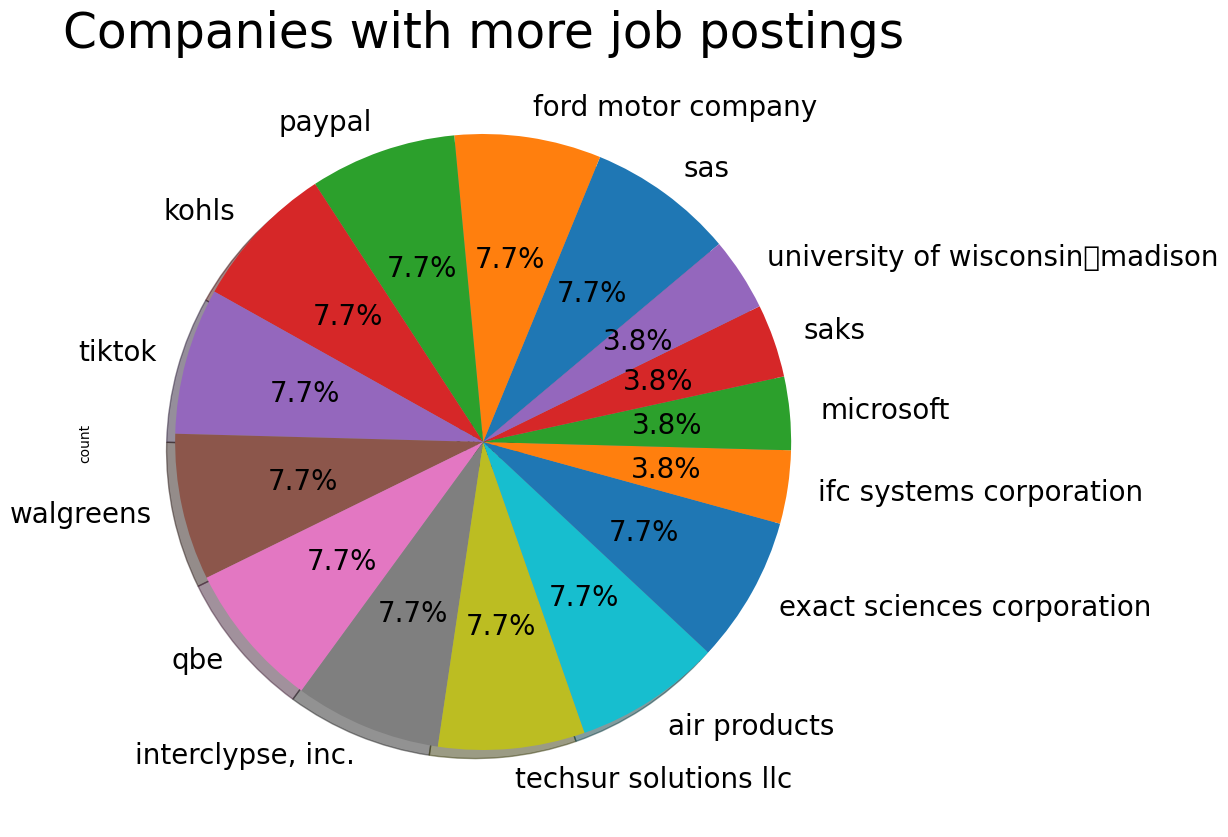

In [86]:
df['company'].value_counts()[:100].plot.pie(figsize=(12,10), shadow=True, startangle=40, autopct='%1.1f%%', fontsize=20)
plt.title("Companies with more job postings",fontsize=35)
plt.show()

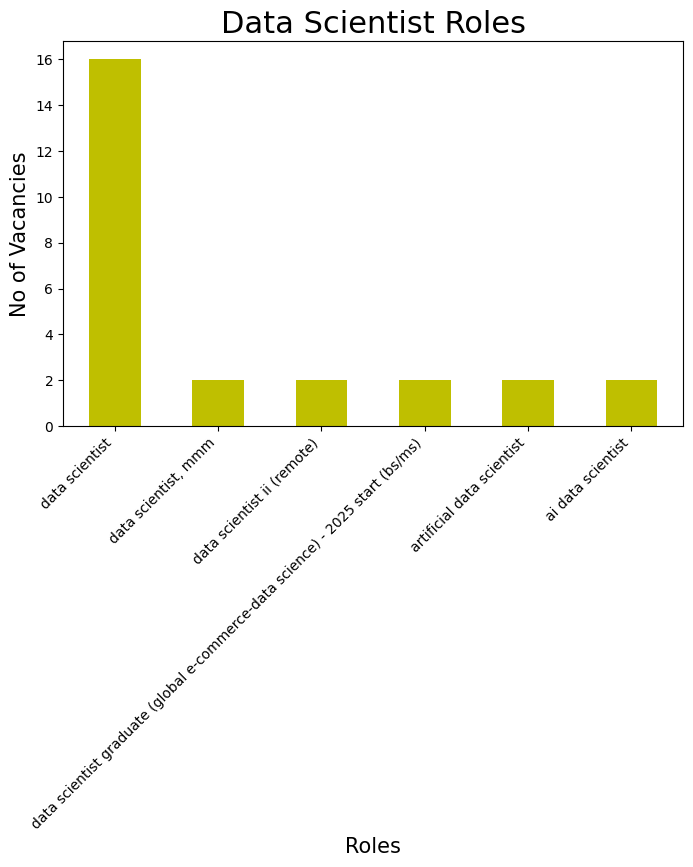

In [87]:
# Roles
df["title"].value_counts()[:100].plot.bar(figsize=(8,5),fontsize=10,color="y")
plt.xticks(rotation=45,ha='right')
plt.title("Data Scientist Roles",fontsize=22)
plt.ylabel("No of Vacancies",fontsize=15,rotation=90)
plt.xlabel("Roles",fontsize=15)
plt.show()

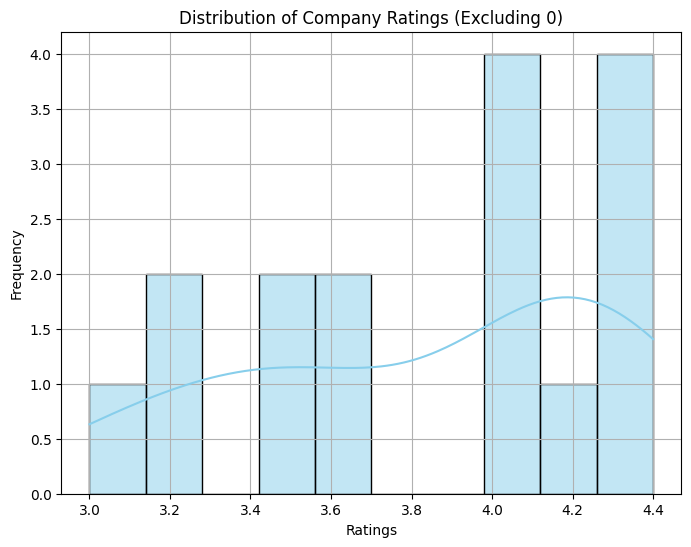

In [125]:
# Filter out ratings with value 0
filtered_ratings = df[df['rating'] > 0]

# Plotting a histogram for filtered ratings
# plt.figure(figsize=(10, 5))
# plt.hist(filtered_ratings['rating'], bins=10, color='skyblue', edgecolor='black')
# plt.title('Distribution of Ratings (Excluding 0)')
# plt.xlabel('Ratings')
# plt.ylabel('Frequency')
# plt.grid(axis='y', alpha=0.75)
# plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(filtered_ratings['rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Company Ratings (Excluding 0)')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

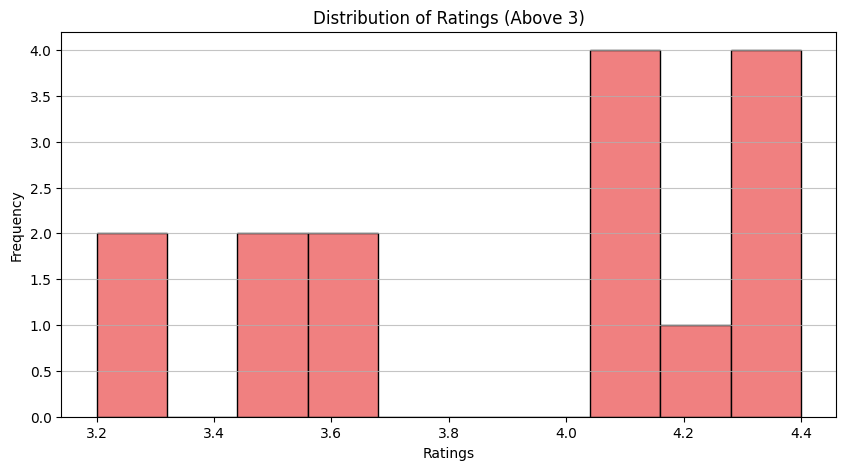

In [126]:
# Filter companies with ratings above 3
high_rated_companies = df[df['rating'] > 3]

# Plotting a histogram for ratings above 3
plt.figure(figsize=(10, 5))
plt.hist(high_rated_companies['rating'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Distribution of Ratings (Above 3)')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [103]:
# Select relevant columns (e.g., company name and rating)
high_rated_companies_list = high_rated_companies[['company', 'rating']]

# Display the list as an interactive table
display(high_rated_companies_list)

,company,rating
0,sas,4.1
1,ford motor company,4.1
3,kohls,3.6
6,qbe,3.5
7,"interclypse, inc.",4.3
9,ifc systems corporation,4.3
11,microsoft,4.2
12,exact sciences corporation,3.2
13,sas,4.1
14,ford motor company,4.1


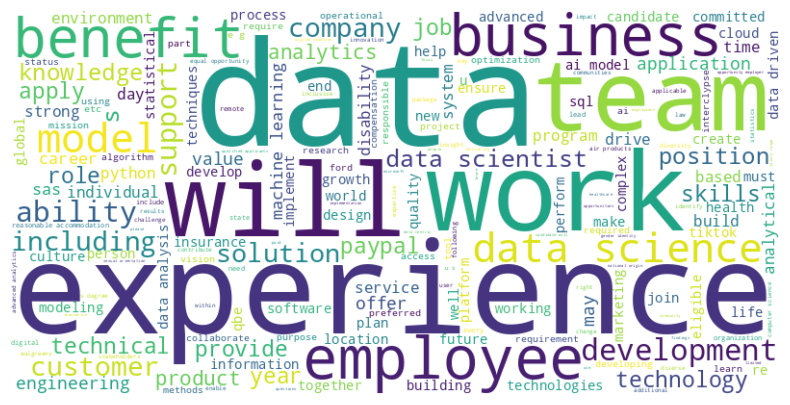

In [90]:
# Combine all descriptions into a single string
text = ' '.join(df['description'].dropna())  # Drop NaN values to avoid errors

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()


From the word clouds, we can see that experience is the most important factor for data scientists. Additionally, the words 'data' and 'team' are also highlighted.

In [130]:
# List of terms to count
terms = ['machine learning', 'data science', 'python', 'data analysis', 'artificial intelligence', 'sql', 'nlp', 'deep learning']

# Initialize a dictionary to hold the counts
term_counts = {term: 0 for term in terms}

# Count occurrences of each term in the description column
for term in terms:
    term_counts[term] = df['description'].str.lower().str.count(term).sum()  # Convert to lower case for case-insensitive counting

# Display the counts
print(term_counts)

{'machine learning': np.int64(32), 'data science': np.int64(69), 'python': np.int64(28), 'data analysis': np.int64(24), 'artificial intelligence': np.int64(7), 'sql': np.int64(25), 'nlp': np.int64(2), 'deep learning': np.int64(4)}


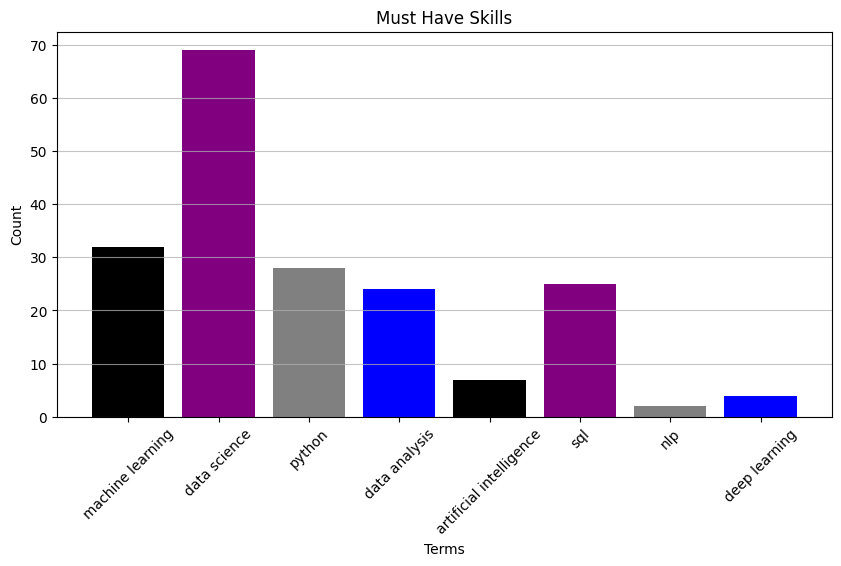

In [131]:
# Create a bar plot for the word counts
plt.figure(figsize=(10, 5))
plt.bar(term_counts.keys(), term_counts.values(), color=["black","purple","grey","blue"])
plt.title('Must Have Skills')
plt.xlabel('Terms')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.75)
plt.show()

{'python': np.int64(28), 'sql': np.int64(25), 'sas': np.int64(32), 'java': np.int64(5)}


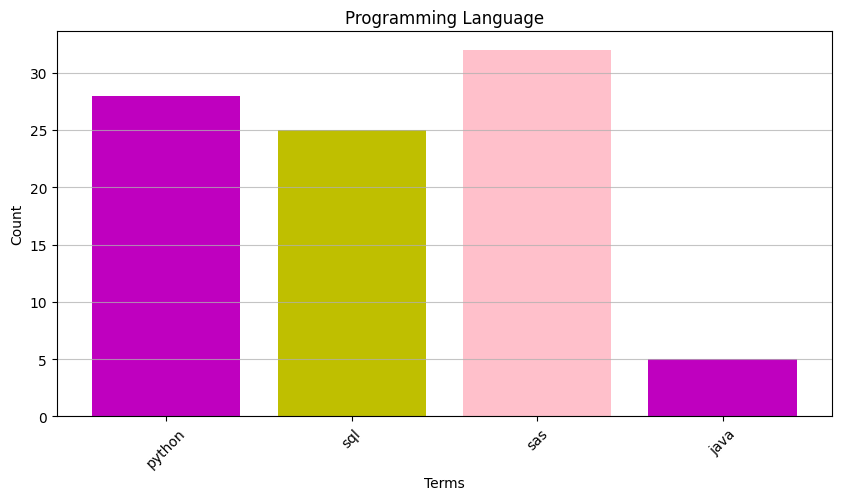

In [115]:
# List of terms to count
terms = ['python', 'sql', 'sas', 'java']

# Initialize a dictionary to hold the counts
term_counts = {term: 0 for term in terms}

# Count occurrences of each term in the description column
for term in terms:
    term_counts[term] = df['description'].str.lower().str.count(term).sum()  # Convert to lower case for case-insensitive counting

# Display the counts
print(term_counts)

# Create a bar plot for the word counts
plt.figure(figsize=(10, 5))
plt.bar(term_counts.keys(), term_counts.values(), color=["m","y","pink"])
plt.title('Programming Language')
plt.xlabel('Terms')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.75)
plt.show()

{'spark': np.int64(10), 'hadoop': np.int64(2), 'hive': np.int64(2), 'kafka': np.int64(0)}


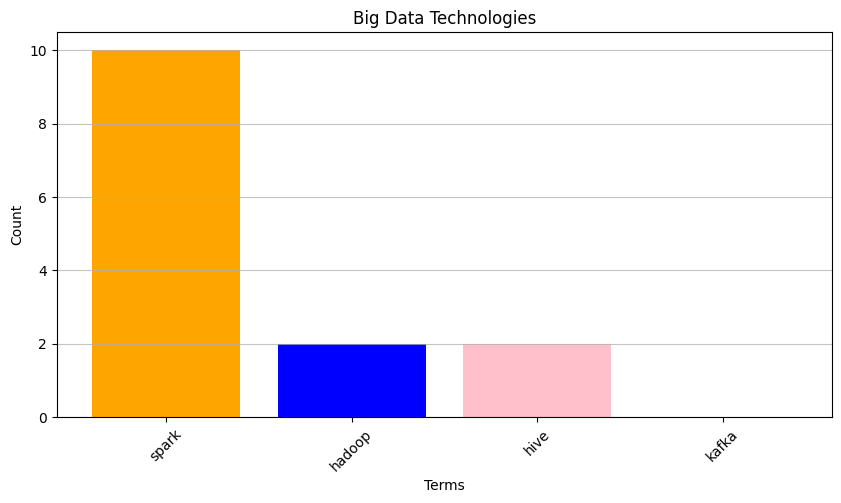

In [117]:
# List of terms to count
terms = ['spark', 'hadoop', 'hive', 'kafka']

# Initialize a dictionary to hold the counts
term_counts = {term: 0 for term in terms}

# Count occurrences of each term in the description column
for term in terms:
    term_counts[term] = df['description'].str.lower().str.count(term).sum()  # Convert to lower case for case-insensitive counting

# Display the counts
print(term_counts)

# Create a bar plot for the word counts
plt.figure(figsize=(10, 5))
plt.bar(term_counts.keys(), term_counts.values(), color=["orange","blue","pink"])
plt.title('Big Data Technologies')
plt.xlabel('Terms')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.75)
plt.show()

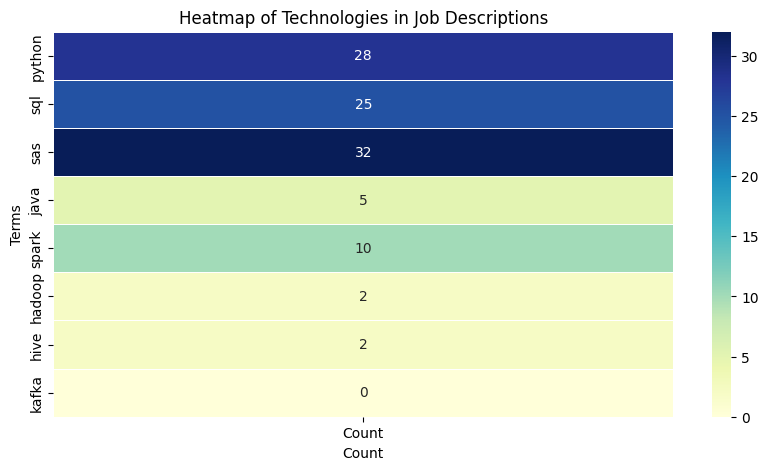

In [124]:
# List of terms to count
terms = ['python', 'sql', 'sas', 'java', 'spark', 'hadoop', 'hive', 'kafka']

# Initialize a dictionary to hold the counts
term_counts = {term: 0 for term in terms}

# Count occurrences of each term in the description column
for term in terms:
    term_counts[term] = df['description'].str.lower().str.count(term).sum()  # Convert to lower case for case-insensitive counting

# Create a DataFrame for the heatmap
heatmap_data = pd.DataFrame(list(term_counts.items()), columns=['Term', 'Count'])

# Reshape the DataFrame for heatmap
heatmap_matrix = heatmap_data.set_index('Term')

# Create a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_matrix, annot=True, cmap='YlGnBu', cbar=True, fmt='g', linewidths=.5)
plt.title('Heatmap of Technologies in Job Descriptions')
plt.xlabel('Count')
plt.ylabel('Terms')
plt.show()

## Conclusion

The job market for Data Science remains strong in the USA, with 30% of positions offering remote work. The top three programming languages in demand are SQL, SAS, and Python. Among big data technologies, Spark is the most commonly used. Machine learning continues to be an essential skill for data scientists.